In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Process Discrete Data

## Kalman Filter

In [ ]:
KF = np.load('KF_n1000.npy')
print(KF.shape)

KF_avg = np.mean(KF, axis=0, keepdims=True)
print(KF_avg.shape)

In [ ]:
def vis_data_KF(data, xticklabels):
    
    fig = plt.plot(figsize=(10, 10))
    
    sns.heatmap(data, annot=True, fmt='.0f',
                xticklabels=xticklabels,
                vmin=0,
                vmax=500,
                cmap=sns.cm.rocket_r)
    
    plt.tight_layout()
    plt.title('Kalman Filter')
    plt.show()

In [ ]:
vis_data_KF(KF_avg, 
            xticklabels=['# step converge', '# step reset belief', '# step reconverge'])

## Particle Filter

In [ ]:
PF = np.load('PF_n1000.npy')
print(PF.shape)

PF_avg = np.mean(PF, axis=0)
print(PF_avg.shape)

In [ ]:
def vis_data_2_PF(data, data_names, data_ticks, metric_names):
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for i in range(4):
        row = int(i / 2)
        col = int(i % 2)
        
        if i == 3:
            vmax = 3
            fmt = '.2f'
        else:
            vmax = 500
            fmt='.0f'
        
        s = sns.heatmap(
                data[:, :, i], 
                annot=True, fmt=fmt,
                xticklabels=data_ticks[1], 
                yticklabels=data_ticks[0],
                vmin=0,
                vmax=vmax,
                ax = axs[row, col],
                cmap=sns.cm.rocket_r)
        
        axs[row, col].title.set_text(metric_names[i])
        axs[row, col].set_xlabel(data_names[1])
        axs[row, col].set_ylabel(data_names[0])

    plt.tight_layout()
    plt.show()

In [ ]:
ns_particles = [10, 50, 100, 500, 1000, 5000]
resampling_constants = [2, 5, 10, 20, 50]

vis_data_2_PF(PF_avg, 
              data_names = ['# Particles', 'Resampling Constant'],
              data_ticks = [ns_particles, resampling_constants],
              metric_names = ['# step converge', '# step reset belief', '# step reconverge', 'runtime'])

## Adaptive Monte Carlo

In [ ]:
AMCL = np.load('AMCL_n1000.npy')
print(AMCL.shape)

AMCL_avg = np.mean(AMCL, axis=0)
print(AMCL_avg.shape)

## Divide total number of particles used by total iterations run
AMCL_avg[:, :, :, :, 0] /= (AMCL_avg[:, :, :, :, 1] + AMCL_avg[:, :, :, :, 3] + 5)

AMCL_avg_n_particles = np.mean(AMCL_avg, axis=0)
print(AMCL_avg_n_particles.shape)

AMCL_avg_n_particles_only = np.mean(AMCL_avg, axis=(1, 2, 3))
print(AMCL_avg_n_particles_only.shape)

In [ ]:
def vis_data_1_AMCL(data, xticklabels, yticklabels):
    
    fig = plt.plot(figsize=(10, 10))
    
    sns.heatmap(data.T, annot=True, fmt='.0f',
                xticklabels=xticklabels,
                yticklabels=yticklabels,
                vmin=0,
                vmax=1000,
                cmap=sns.cm.rocket_r)
    
    plt.tight_layout()
    plt.title('Adaptive Monte Carlo')
    plt.xlabel('# Particles')
    plt.show()

In [ ]:
ns_particles = [10, 100, 1000]
metric_names = ['# Total Particles', '# step converge', '# step reset belief', '# step reconverge', 'runtime']

vis_data_1_AMCL(AMCL_avg_n_particles_only, ns_particles, metric_names)

In [ ]:
def vis_data_3_AMCL(data, data_names, data_ticks, metric_names):
    
    n_metrics = len(metric_names)
    data_last_dim = data.shape[-2]
    
    fig, axs = plt.subplots(n_metrics, data_last_dim, figsize=(15, 20))
    
    for i in range(n_metrics):
        
        if i == 0:
            vmax = 1000
            fmt = '.0f'
        elif i == 4:
            vmax = 3
            fmt = '.2f'
        else:
            vmax = 500
            fmt='.0f'
        
        for j in range(data_last_dim):    
            s = sns.heatmap(data[:, :, j, i], 
                        annot=True, fmt=fmt,
                        xticklabels=data_ticks[1], 
                        yticklabels=data_ticks[0],
                        vmin=0,
                        vmax=vmax,
                        ax = axs[i, j],
                        cmap=sns.cm.rocket_r)
            
            axs[i, j].title.set_text(metric_names[i] + '\nfor ' + data_names[-1] + ' = ' + str(data_ticks[-1][j]))
            axs[i, j].set_xlabel(data_names[1])
            axs[i, j].set_ylabel(data_names[0])

    plt.tight_layout()
    plt.show()

In [ ]:
resample_threshold_factors = [1.2, 1.5, 2, 2.5]
n_particles_factors = [1, 2.5, 5]  ## Same as score coefficient
aveWeights_factors = [1, 1.5, 2, 3] 

vis_data_3_AMCL(
    AMCL_avg_n_particles, 
    data_names = ['Resample Threshold Factor', 'Score Coefficient', 'Avg Weights Factor'],
    data_ticks = [resample_threshold_factors, n_particles_factors, aveWeights_factors],
    metric_names = ['# Total Particles', '# step converge', '# step reset belief', '# step reconverge', 'runtime'])

# Process Continuous Data

## Particle Filter

In [ ]:
CPF1 = np.load('CPF_n100_1.npy')
print(CPF1.shape)

CPF1 = CPF1[:, 0, 0, 0, :, :, :, :]
print(CPF1.shape)

CPF1_avg = np.mean(CPF1, axis=0)
print(CPF1_avg.shape)

## Set the runs that did not finish to max iteration
CPF1_avg[CPF1_avg == 0] = 1000

In [ ]:
def vis_data_3_CPF(data, data_names, data_ticks, metric_names):
    
    data_last_dim = data.shape[-2]
    
    fig, axs = plt.subplots(4, data_last_dim, figsize=(15, 20))

    for i in range(4):
        
        if i == 3:
            vmax = 300
        else:
            vmax = 1000
        for j in range(data_last_dim):    
            s = sns.heatmap(data[:, :, j, i], 
                        annot=True, fmt='.0f',
                        xticklabels=data_ticks[1], 
                        yticklabels=data_ticks[0],
                        vmin=0,
                        vmax=vmax,
                        ax = axs[i, j],
                        cmap=sns.cm.rocket_r)
            
            axs[i, j].title.set_text(metric_names[i] + '\nfor ' + data_names[-1] + ' = ' + str(data_ticks[-1][j]))
            axs[i, j].set_xlabel(data_names[1])
            axs[i, j].set_ylabel(data_names[0])

    plt.tight_layout()
    plt.show()

In [ ]:
resampling_constants = [5, 10, 20, 40]
sensor_diff_powers = [1, 1.5, 2]
reset_belief_thresholds = [1e-4, 1e-6, 1e-8]

vis_data_3_CPF(CPF1_avg, 
           data_names = ['Resampling Constant', 'Sensor Diff Power', 'Reset Belief Threshold'],
           data_ticks = [resampling_constants, sensor_diff_powers, reset_belief_thresholds],
           metric_names = ['# step converge', '# step reset belief', '# step reconverge', 'runtime'])

In [ ]:
CPF2 = np.load('CPF_n100_2.npy')
print(CPF2.shape)

CPF2 = CPF2[:, :, :, :, 0, 0, 0, :]
print(CPF2.shape)

CPF2_avg = np.mean(CPF2, axis=0)
print(CPF2_avg.shape)

## Set the runs that did not finish to max iteration
CPF2_avg[CPF2_avg == 0] = 1000

In [ ]:
ns_particles = [100, 500, 1000, 2000]
lidar_ranges = [50, 150, 300]
ns_rays = [8, 12, 20]

vis_data_3_CPF(CPF2_avg, 
           data_names = ['# Particles', 'Lidar Range', '# Rays'],
           data_ticks = [ns_particles, lidar_ranges, ns_rays],
           metric_names = ['# step converge', '# step reset belief', '# step reconverge', 'runtime'])

## Adaptive Monte Carlo

In [6]:
CAMCL = np.load('CAMCL_n100.npy')
print(CAMCL.shape)

CAMCL_avg = np.mean(CAMCL, axis=0)
print(CAMCL_avg.shape)

## Divide total number of particles used by total iterations run
CAMCL_avg[:, :, :, :, 0] /= (CAMCL_avg[:, :, :, :, 1] + CAMCL_avg[:, :, :, :, 3] + 5)

# Set the runs that did not finish to max iteration
CAMCL_avg[CAMCL_avg == 0] = 1000

print(np.sum(np.var(CAMCL_avg, axis=0)))
print(np.sum(np.var(CAMCL_avg, axis=1)))
print(np.sum(np.var(CAMCL_avg, axis=2)))
print(np.sum(np.var(CAMCL_avg, axis=3)))

CAMCL_avg_weights_factors = np.mean(CAMCL_avg, axis=2)
print(CAMCL_avg_weights_factors.shape)

(100, 3, 3, 3, 3, 5)
(3, 3, 3, 3, 5)
4496134.413295737
4548198.067454587
1504178.2392715053
4229772.558396289
(3, 3, 3, 5)


In [7]:
def vis_data_3_CAMCL(data, data_names, data_ticks, metric_names):
    
    data_last_dim = data.shape[-2]
    n_metrics = len(metric_names)
    
    fig, axs = plt.subplots(n_metrics, data_last_dim, figsize=(15, 20))

    for i in range(n_metrics):
        
        if i == 0:
            vmax = 1000
        elif i == 4:
            vmax = 300
        else:
            vmax = 500
        for j in range(data_last_dim):    
            s = sns.heatmap(data[:, :, j, i], 
                        annot=True, fmt='.0f',
                        xticklabels=data_ticks[1], 
                        yticklabels=data_ticks[0],
                        vmin=0,
                        vmax=vmax,
                        ax = axs[i, j],
                        cmap=sns.cm.rocket_r)
            
            axs[i, j].title.set_text(metric_names[i] + '\nfor ' + data_names[-1] + ' = ' + str(data_ticks[-1][j]))
            axs[i, j].set_xlabel(data_names[1])
            axs[i, j].set_ylabel(data_names[0])

    plt.tight_layout()
    plt.show()

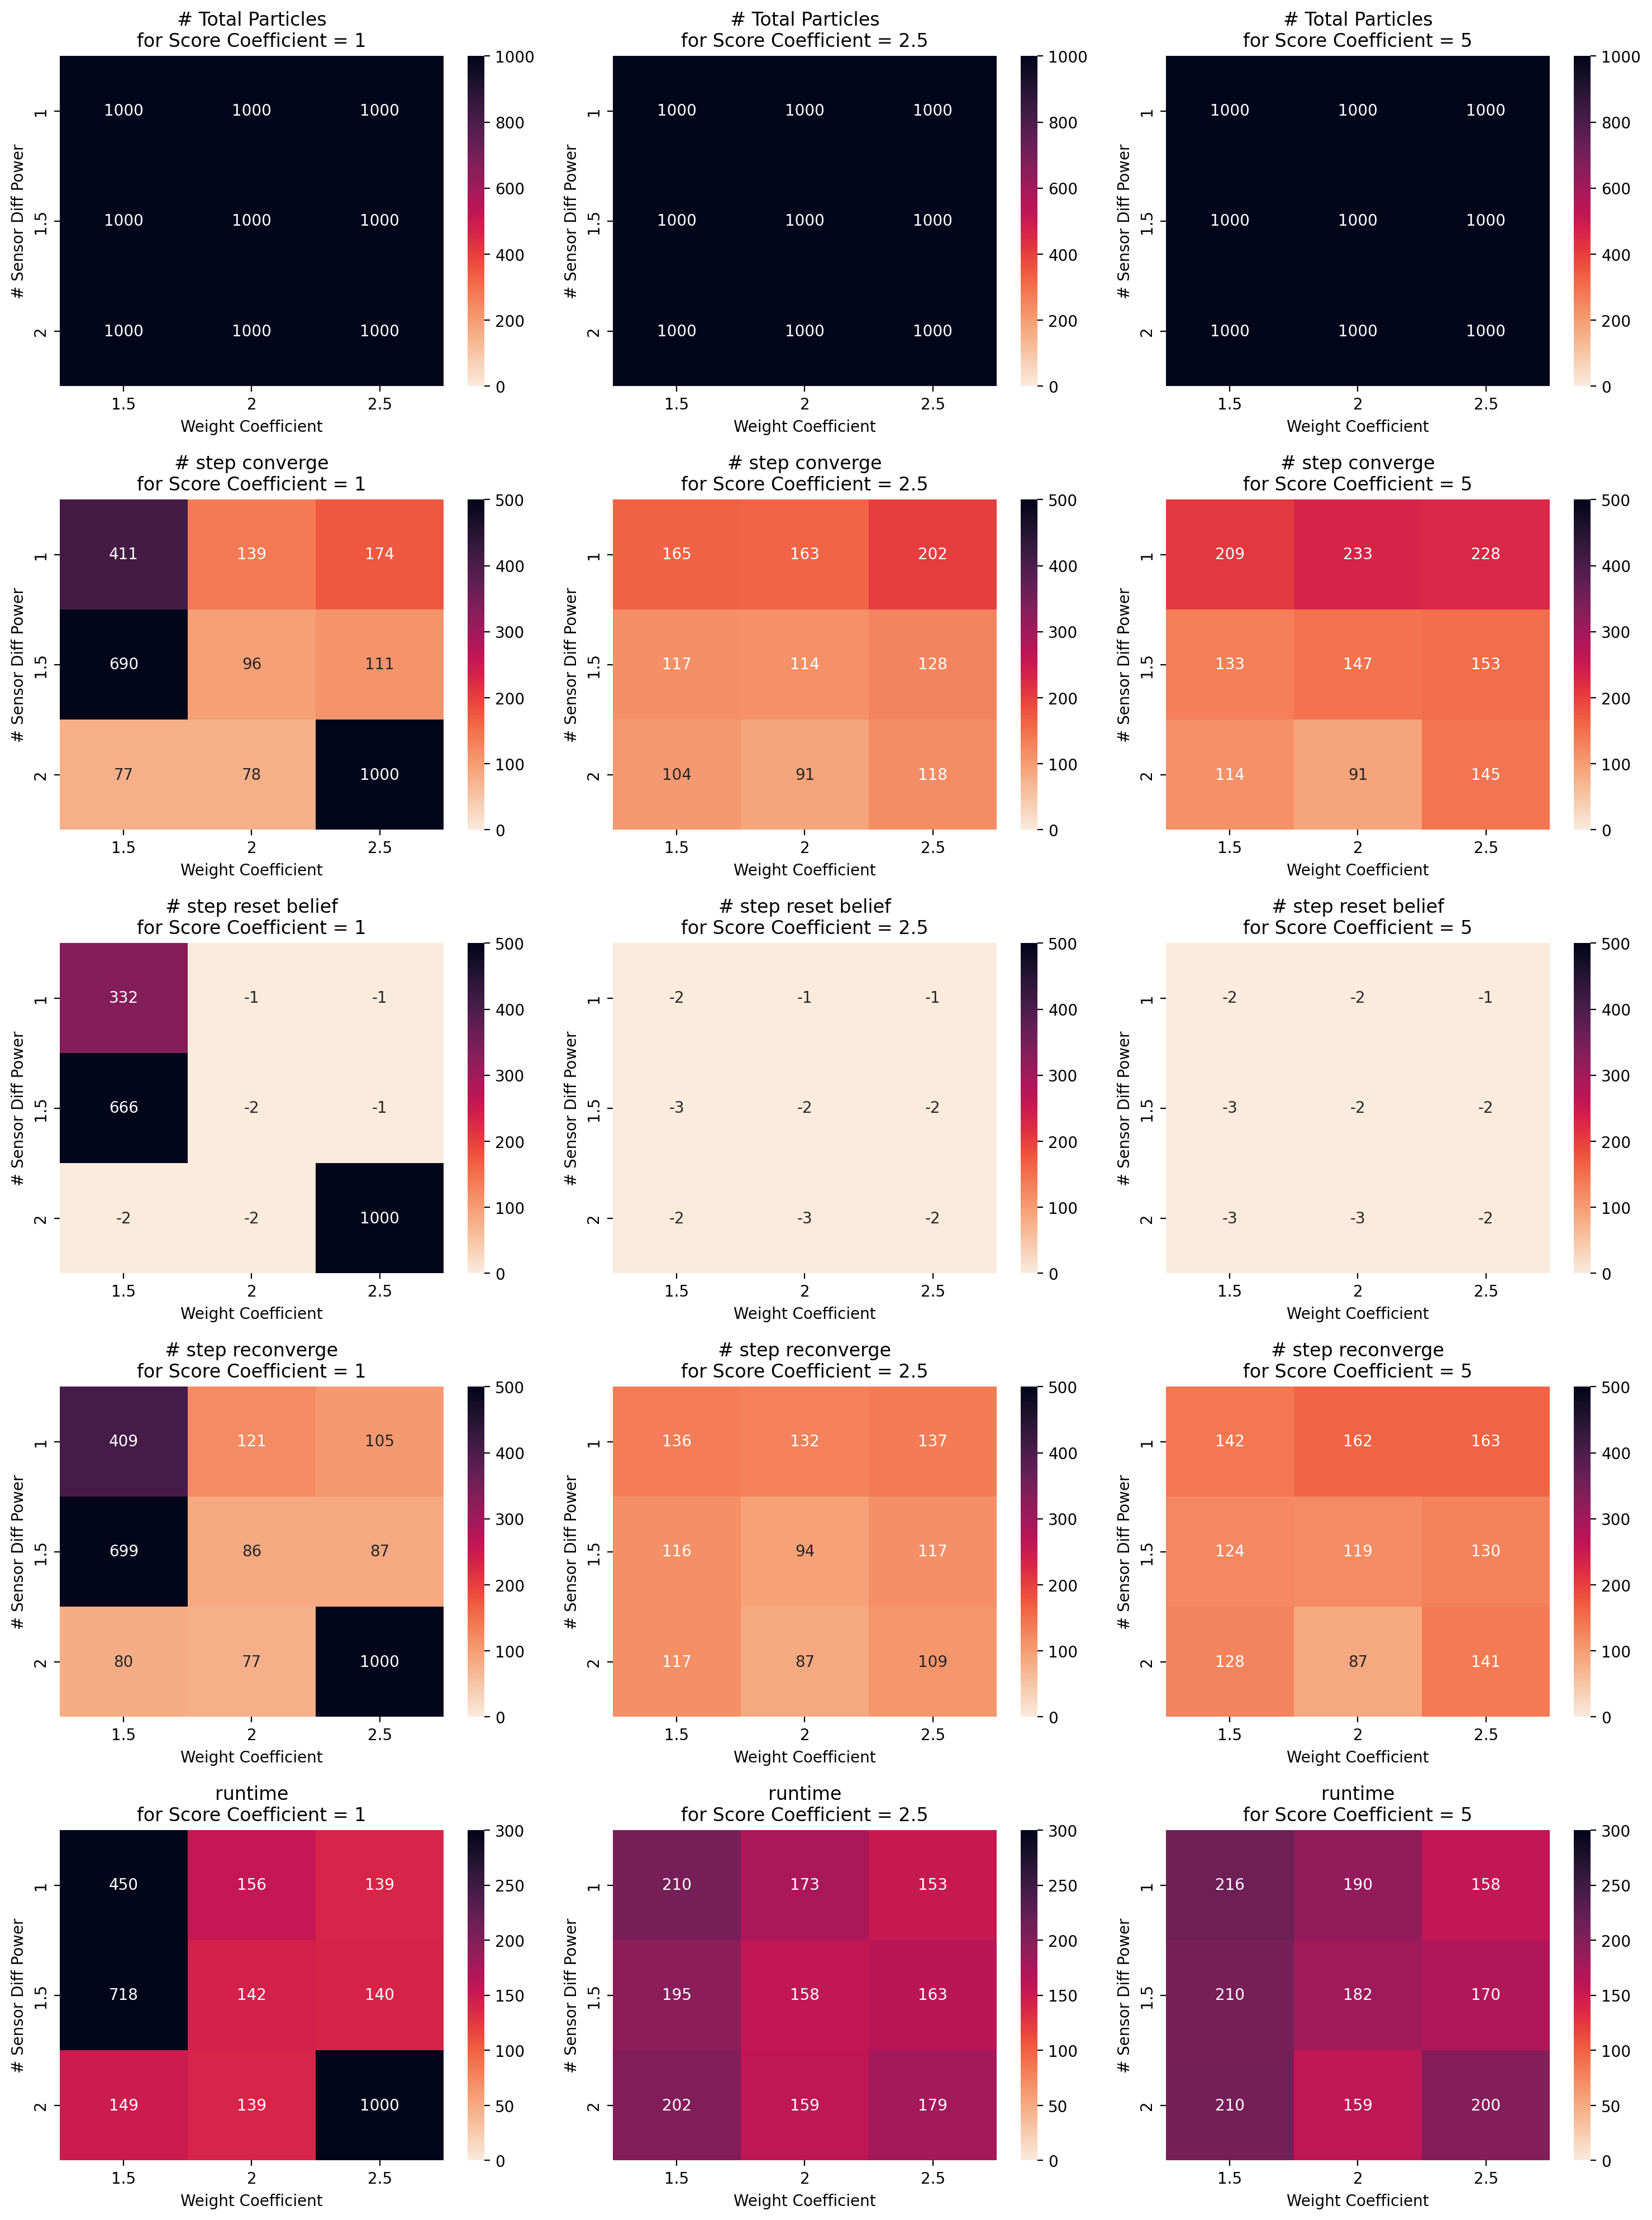

In [8]:
sensor_diff_powers = [1, 1.5, 2]
weight_coefs = [1.5, 2, 2.5]
# aveWeights_factors = [1.5, 2, 2.5]
score_coefs = [1, 2.5, 5]

vis_data_3_CAMCL(
    CAMCL_avg_weights_factors, 
    data_names = ['# Sensor Diff Power', 'Weight Coefficient', 'Score Coefficient'],
    data_ticks = [sensor_diff_powers, weight_coefs, score_coefs],
    metric_names = ['# Total Particles', '# step converge', '# step reset belief', '# step reconverge', 'runtime'])

In [ ]:
def vis_data(data, xticklabels, yticklabels):
    
    fig = plt.plot()
    
    sns.heatmap(data, annot=True, fmt='.0f',
                xticklabels=xticklabels, 
                yticklabels=yticklabels)
    
    plt.ylabel('# particles')
    plt.tight_layout()
    plt.show()

In [ ]:
def format_extra_data_PF(data, max_iter=1000, n_steps_kidnap=5):
    n_ns_particles = data.shape[1]

    n_no_converge = np.zeros((n_ns_particles))
    n_no_reset = np.zeros((n_ns_particles))
    n_no_reconverge = np.zeros((n_ns_particles))
    
    for i in range(data.shape[1]):
        
        data_ = data[:, i, :]
        
        ## Count number of runs that did not converge
        n_no_converge[i] = (data_[:, 0] == max_iter).sum()
        
        ## Count number of runs that did not reconverge
        n_no_reconverge[i] = ((data_[:, 0] + data_[:, 2]) >= max_iter - 1).sum()
        
        ## Count number of runs that did not reset belief after being kidnapped
        n_no_reset[i] = (data_[:, 1] < 0).sum()
        
    data_extra = np.zeros((n_ns_particles, 3))
    data_extra[:, 0] = n_no_converge
    data_extra[:, 1] = n_no_reset
    data_extra[:, 2] = n_no_reconverge
    
    return data_extra

In [ ]:
def format_extra_data_KF(data, max_iter=1000, n_steps_kidnap=5):

    n_no_converge = (data[:, 0] == max_iter).sum()
    n_no_reset = (data[:, 1] < 0).sum()
    n_no_reconverge = ((data[:, 0] + data[:, 2]) >= max_iter - 1).sum()
        
    data_extra = np.zeros((1, 3))
    data_extra[:, 0] = n_no_converge
    data_extra[:, 1] = n_no_reset
    data_extra[:, 2] = n_no_reconverge
    
    return data_extra

In [ ]:
data_PF = np.load('PF_n1000.npy')
print(data_PF.shape)

In [ ]:
ns_particles = [10, 50, 100, 500, 1000, 5000]
data_PF_avg = np.mean(data_PF, axis=0)
vis_data(data_PF_avg, 
         xticklabels=['# step converge', '# step reset belief', '# step reconverge'], 
         yticklabels=ns_particles)

In [ ]:
data_PF_extra = format_extra_data_PF(data_PF)
vis_data(data_PF_extra, 
         xticklabels=['# no converge', '# no reset', '# no reconverge'], 
         yticklabels=ns_particles)

In [ ]:
data_KF = np.load('KF_n1000.npy')
print(data_KF.shape)

In [ ]:
data_KF_avg = np.mean(data_KF, axis=0).reshape((1, 3))
vis_data(data_KF_avg, 
         xticklabels=['# step converge', '# step reset belief', '# step reconverge'], 
         yticklabels=['Kalman Filter'])

In [ ]:
data_KF_extra = format_extra_data_KF(data_KF)
vis_data(data_KF_extra, 
         xticklabels=['# no converge', '# no reset', '# no reconverge'], 
         yticklabels=['Kalman Filter'])

In [ ]:
data_PF_KF_avg = np.concatenate((data_PF_avg, data_KF_avg), axis=0)
vis_data(data_PF_KF_avg, 
         xticklabels=['# step converge', '# step reset belief', '# step reconverge'], 
         yticklabels=ns_particles + ['Kalman Filter'])

In [ ]:
data_PF_KF_extra = np.concatenate((data_PF_extra, data_KF_extra), axis=0)
vis_data(data_PF_KF_extra, 
         xticklabels=['# no converge', '# no reset', '# no reconverge'], 
         yticklabels=ns_particles + ['Kalman Filter'])